In [1]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
import os, shutil

test_dir = '/home/starflyyy/Deep learning/Dog_vs_cats/test1'
original_dir = '/home/starflyyy/Deep learning/Dog_vs_cats/train'
base_dir = '/home/starflyyy/Deep learning/Dog_vs_cats/final_train_data'
# os.mkdir(base_dir)
#os.mkdir(test_dir)

In [3]:
# train_cats_dir = os.path.join(base_dir, 'cats')
# os.mkdir(train_cats_dir)

# train_dogs_dir = os.path.join(base_dir, 'dogs')
# os.mkdir(train_dogs_dir)

In [4]:
# fnames = ['cat.{}.jpg'.format(i) for i in range(12500)]
# for fname in fnames:
#     src = os.path.join(original_dir, fname)
#     dst = os.path.join(train_cats_dir, fname)
#     shutil.copyfile(src, dst)

In [5]:
# fnames = ['dog.{}.jpg'.format(i) for i in range(12500)]
# for fname in fnames:
#     src = os.path.join(original_dir, fname)
#     dst = os.path.join(train_dogs_dir, fname)
#     shutil.copyfile(src, dst)

In [24]:
test1_dir = '/home/starflyyy/Deep learning/Dog_vs_cats/test1'
fnames = ['{}.jpg'.format(i) for i in range(1, 12501)]
for fname in fnames:
    src = os.path.join(test1_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
from keras import layers
from keras import models
from keras import optimizers
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1. / 255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(base_dir, 
                                                    target_size = (150, 150), 
                                                    batch_size = 20, 
                                                    class_mode = 'binary')

Found 25000 images belonging to 2 classes.


In [29]:
test_datagen = ImageDataGenerator(rescale = 1. / 255)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size = (150, 150),
                                                  batch_size = 20,
                                                  class_mode = None
                                                 )

Found 12500 images belonging to 1 classes.


In [20]:
test_dir

'/home/starflyyy/Deep learning/Dog_vs_cats/test1'

In [9]:
conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (150, 150, 3))
conv_base.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0    

In [10]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [11]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [12]:
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 2e-5), metrics = ['acc'])

history = model.fit_generator(train_generator, steps_per_epoch = 625, epochs = 30)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/30
625/625 [==============================] - 103s 165ms/step - loss: 0.3386 - acc: 0.8501
Epoch 2/30
625/625 [==============================] - 102s 163ms/step - loss: 0.2372 - acc: 0.9023
Epoch 3/30
625/625 [==============================] - 102s 164ms/step - loss: 0.2056 - acc: 0.9130
Epoch 4/30
625/625 [==============================] - 101s 161ms/step - loss: 0.1985 - acc: 0.9166
Epoch 5/30
625/625 [==============================] - 98s 157ms/step - loss: 0.1744 - acc: 0.9262
Epoch 6/30
625/625 [==============================] - 99s 159ms/step - loss: 0.1803 - acc: 0.9289
Epoch 7/30
625/625 [==============================] - 102s 163ms/step - loss: 0.1632 - acc: 0.9355
Epoch 8/30
625/625 [==============================] - 103s 164ms/step - loss: 0.1680 - acc: 0.9342
Epoch 9/30
625/625 [==============================] - 103s 165ms/step - loss: 0.1500 - acc: 0.9397
Epoch 10/30
625/

In [15]:
model.save('cats_and_dogs_final.h5')

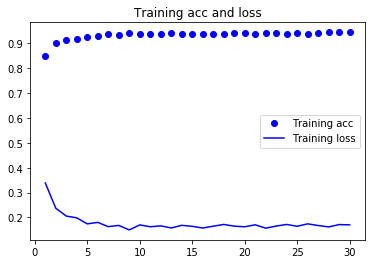

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, 31)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.title('Training acc and loss')
plt.legend()

plt.show()

In [32]:
predict = model.predict_generator(test_generator)

In [33]:
len(predict)

12500

In [36]:
for i in range(12500):
    if predict[i] < 0.5:
        predict[i] = 0
    else:
        predict[i] = 1
predict

array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [42]:
predict = predict.astype(int)

In [44]:
import pandas as pd
index = [i for i in range(1, 12501)]
save = pd.DataFrame(predict)
save.to_csv('test3.csv', header = False, index = False)